<a href="https://colab.research.google.com/github/Repollo1000/ADA-Informes/blob/main/Informe_KnapsackProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Descripcion del problema**

Este problema tendrá una entrada de $n$ objetos con sus respectivos valores que serán ingresados en dos arreglos.

```
Wm [peso máximo mochila]
i [claves]
v [valor]
w [peso o tamaño]
```

*   V representa el valor del objeto
*   W Peso de los objetos
*   Wm peso máximo mochila
*   i Claves para cada objeto

La intención de este problema es lograr calcular el subconjunto de valor máximo donde la suma de los pesos no supere el peso máximo soportado por la mochila sin dividir el objeto.

Este problema se puede resolver de varias maneras, la primera manera que vamos a ver será con un algoritmo dinámico y la otra manera se utilizara la estrategia de greedy.

# **2.Descripcion del algoritmo**

## **2.1.Implementacion programación dinámica**

Como vimos en informes pasados la programación dinámica su utiliza cuando los sub problemas se repiten varias veces, para estos casos nos conviene crear una tabla para ir guardando los sub problemas y evitar resolver los mismos problemas más de una vez.

Ahora, para resolver el problema de la mochila dinámico debemos seguir una serie de pasos y así lograr la solución más óptima. 
Este algoritmo va a recibir una matriz del tamaño del peso máximo de la mochila (**Wm+1 x Wm+1**), las claves de cada objeto, los valores de los objetos.

Los pasos para que el algoritmo funcione de manera dinámica seria:


1.   Generar e inicializar la matriz con 0
2.   Recorrer filas y columnas de la matriz
3.   En cada ciclo calcular el máximo valor posible
4.   En el caso de que efectivamente es mayor al valor anterior, guardar en la matriz




## **2.2.Implementacion con metodo greedy**

Para resolver **problemas de optimización**, un **algoritmo voraz** (o greedy) es uno que realiza, en cada momento, la acción que **parece ser la mejor**.

Los algoritmos voraces son métodos bastante potentes que funcionan bien en una amplia gama de problemas. Sin embargo, **no siempre encuentran la solución óptima**.



*   Se crea un arreglo con los indices de las claves.
*   Se calcula valor / peso y se guarda en un arreglo.
*   Se ordennan de mator a menor.
*   Se recorre el arreglo de izquierda a derecha agregando lo items a la mochila.



## **2.3 Ejemplo paso a paso**

$W=5$ 
 
tres items: 

$w_1=1, v_1=6$

$w_2=2,v_2=10$

$w_3=3,v_3=12$

tabla 


Primero logramos tener un arreglo entre $v[i]/p[i]$ 
```
v[i]  =  [6]  [12]  [10]

p[i]  =  [1]   [3]   [2] 

v[i]/p[i] = [6]   [4]   [5]

```
Despúes ordenamos de menor a mayor 
```
v[i]  =    [12]  [10] [6] 

p[i]  =    [3]   [2]  [1] 

v[i]/p[i] =  [4] [5]  [6]

```

Finalmente se llena la mochila hasta completar el peso máximo. 

En este caso el valor seria 22 y la mochila contendiria 

v[i]  =    [12] + [10] = 22-->valor

p[i]  =    [3]  + [2] = 5-->peso

## **2.4.Código**

In [ ]:
import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

W, val, wt = knapsack_instance_generator(10)

In [ ]:
print(W,val,wt)

58 [9, 53, 109, 126, 131, 152, 226, 321, 416, 435] [7, 2, 7, 9, 14, 10, 11, 13, 20, 24]


### **Codigo dinamico**

In [66]:
import numpy as np
from math import inf
import random 

def knapSack_dinamico(W, wt, val, n,cont,verbose = False):
    #se grenera una matriz del peso + 1
    #K = [[0 for x in range(W + 1)] for x in range(n + 1)]
    K = np.zeros((n+1,W+1))
    if verbose == True:
      print("se crea la matriz")
      print(K)
      print("\n")
    # se construye la matriz K[][] del metodo bottom up 
    for i in range(n + 1):
        for j in range(W + 1):
            cont[0] = cont[0] + 1
            if i == 0 or j == 0:
                K[i][j] = 0
            elif wt[i-1] <= j:
                K[i][j] = max(val[i-1] + K[i-1][j-wt[i-1]], K[i-1][j])
                #print("se calcula el valor maximo en la posicion","[",i,j,"]" )
            else:
              K[i][j] = K[i-1][j]
            if verbose == True:
              print("Matriz resultante despues de calcular el maximo")
              print(K)
              print("")

    if verbose == True:
      print("Se escoge la ultima casilla")
    return K[n][W]

cont = [0]
verbose = False
val = [6, 10, 12]
wt = [1, 2, 3]
W = 5
n = len(val)

print(knapSack_dinamico(W, wt, val, n,cont,verbose))



22.0


### **Codigo greedy**

In [93]:
def KnapSack_greedy(val, wt, W, n,cont, verbose = False):
	
  Val_wt = []
  indices = []

  #Se inicializan ambos arreglos
  for i in range(n): Val_wt.append(val[i] / wt[i])

  if verbose == True: print(f"Arreglo de razones valor/peso de cada objeto: {Val_wt}")
  
  for i in range(n): indices.append(i)
  if verbose == True: print(f"Arreglo de indices de cada objeto: {indices}")

  if verbose == True: 
    print("Se ordenan los arreglos")
    print(" ")

  for i in range(n):
    mayor = 0
    for j in range(i, n):

      if (Val_wt[j] > mayor): 
        if verbose == True: print(f"{Val_wt[j]} > {mayor} ")
        mayor = Val_wt[j]
        if verbose == True: print(f"Valor máximo: {mayor}")
        Val_wt[j], Val_wt[i] = Val_wt[i], Val_wt[j]
        indices[j], indices[i] = indices[i], indices[j]

    if verbose == True: print(" ")
  
  if verbose == True: 
    print(f"Arreglo ordenado de indices: {indices}")
    print(f"Arreglo val / wt: {Val_wt}")
    print("Almacenamos en la mochila")
    print(" ")

  valorAlmacenado = 0

  #Se recorren los objetos en orden
  for i in indices:
    
    cont[0] += 1
    if (wt[i] <= W):
      valorAlmacenado += val[i]
      W -= wt[i]

  #Finalmente se retorna el máximo valor que se pudo almacenar
  return valorAlmacenado


val = [6, 10, 12]
wt = [1, 2, 3]
W = 5
cont = [0]
verbose = True

n = len(val)
valorMaximo = KnapSack_greedy(val, wt, W, n,cont,verbose)
print(f"Valor maximo {valorMaximo}")
print("Cantidad de iteraciones:", cont)

Arreglo de razones valor/peso de cada objeto: [6.0, 5.0, 4.0]
Arreglo de indices de cada objeto: [0, 1, 2]
Se ordenan los arreglos
 
6.0 > 0 
Valor máximo: 6.0
 
5.0 > 0 
Valor máximo: 5.0
 
4.0 > 0 
Valor máximo: 4.0
 
Arreglo ordenado de indices: [0, 1, 2]
Arreglo val / wt: [6.0, 5.0, 4.0]
Almacenamos en la mochila
 
Valor maximo 16
Cantidad de iteraciones: [3]


## **2.5.Vebose(Dinamico)**

In [ ]:
verbose = True
val = [6, 10, 12]
wt = [1, 2, 3]
W = 5
n = len(val)

print(knapSack_dinamico(W, wt, val, n,verbose))


se crea la matriz
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


Matriz resultante despues de calcular el maximo
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Matriz resultante despues de calcular el maximo
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Matriz resultante despues de calcular el maximo
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Matriz resultante despues de calcular el maximo
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Matriz resultante despues de calcular el maximo
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Matriz resultante despues de calcular el maximo
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Matriz resultante despues de calcular el maximo
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 

## **2.6.Vebose(greedy)**

In [94]:
val = [6, 10, 12]
wt = [1, 2, 3]
W = 20
W, val, wt = knapsack_instance_generator(10)
cont = [0]
verbose = True

n = len(val)
valorMaximo = KnapSack_greedy(val, wt, W, n,cont,verbose)
print(f"Valor maximo {valorMaximo}")
print("Cantidad de iteraciones:", cont)

Arreglo de razones valor/peso de cada objeto: [17.333333333333332, 16.428571428571427, 8.125, 16.0, 17.454545454545453, 16.25, 14.75, 22.90909090909091, 28.88888888888889, 25.272727272727273]
Arreglo de indices de cada objeto: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Se ordenan los arreglos
 
17.333333333333332 > 0 
Valor máximo: 17.333333333333332
17.454545454545453 > 17.333333333333332 
Valor máximo: 17.454545454545453
22.90909090909091 > 17.454545454545453 
Valor máximo: 22.90909090909091
28.88888888888889 > 22.90909090909091 
Valor máximo: 28.88888888888889
 
16.428571428571427 > 0 
Valor máximo: 16.428571428571427
17.333333333333332 > 16.428571428571427 
Valor máximo: 17.333333333333332
17.454545454545453 > 17.333333333333332 
Valor máximo: 17.454545454545453
22.90909090909091 > 17.454545454545453 
Valor máximo: 22.90909090909091
25.272727272727273 > 22.90909090909091 
Valor máximo: 25.272727272727273
 
8.125 > 0 
Valor máximo: 8.125
16.0 > 8.125 
Valor máximo: 16.0
16.428571428571427 > 16.

# **3.Correctitud**

Para demostrar que la solución es correcta debemos realizarnos la siguiente pregunta ¿hemos obtenido la solución óptima?. Sabemos que para obtener la solución óptima debemos encontrar la combinación necesaria que contenga el valor máximo y utilice todo el espacio de la mochila.

**Correctitud (Forma dinámica)**:

Demostraremos la correctitud con la sub estructura óptima que consiste en 3 condiciones para la matriz


*   Si $i = 0$ y $p = 0$  --->  $0$
*   Si $p[i]>p$ ---> $m[i-1,p]$
*   Si $p[i]<=p$ --->  $max(m[ i - 1 , p],m[i-1.p-p[i]]+v[i])$
Para entender mejor las condiciones:


1.   Es para cuando los índices son 0
2.   La segunda sirve para no agregar elementos a la mochila por qué excede la capacidad
3.   Agrega elementos si es que aumenta el valor de la mochila

Desarrollando la correctitud por inducción

**Caso base**: m[i, 0] = m[0, j] = 1 para todo i, j

Este caso base e para cuando el valor máximo es el mismo

**Paso inductivo**:

Para cada m el valor óptimo se encuentra gracias a la sub estructura óptima donde los sub. Problemas siempre estarán correctos.

**Correctitud (Forma greedy)**:

Si analizamos ambos algoritmos con los mismos valores de entrada nos daremos cuenta de que no son iguales, esto ocurre debido a la manera que funciona que se explicó antes, además sabemos que es un algoritmo voraz, es uno que realiza, en cada momento, la acción que parece ser la mejor.


# **4.Tiempo de ejecucion**



**Algoritmo Bottom-Up**:

Contenemos dos ciclos anidados:

  *Filas:* $O(i)$
  
  *Variable de peso:* $O(p)$

Obtener la solución óptima: $O(1)$ 

Se debe iterar i x p cantidad de veces, donde i = n.

**Por lo que el tiempo de ejecución de este algoritmo es de**: $O(n * p)$


**Algoritmo Greedy**:

En este algoritmo tenermos que realizar:

Ordenar los valores : $O(n * log(n))$

Obtener la solución óptima : $O(n)$

**Por lo que el tiempo de ejecución de este algoritmo es de**: $O(n * log(n))$

# **5.Experimentos**

### **Comparar los tiempos de ambos algoritmos en función del tamaño de entrada.**

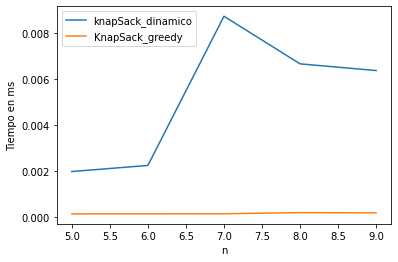

In [101]:
import random
import numpy as np
from timeit import repeat
import matplotlib.pyplot as plt

x=[]; y1=[]; y2=[];

for n in range(5,10):
  W, val, wt = knapsack_instance_generator(n)
  n = len(val)
  verbose = False
  cont = [0]
  cont2 = [0]
  t1= repeat(setup="from __main__ import knapSack_dinamico", stmt=f"knapSack_dinamico({W},{wt},{val},{n},{cont},{verbose})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import KnapSack_greedy", stmt=f"KnapSack_greedy({val},{wt},{W},{n},{cont2},{verbose})", repeat=1, number=10)

  x.append(n)
  y1.append(t1)
  y2.append(t2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["knapSack_dinamico", "KnapSack_greedy"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

### **La cantidad de iteraciones/subproblemas que realizan los algoritmos en función del tamaño de entrada.**

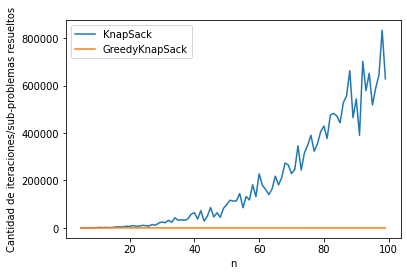

In [105]:
x=[n for n in range(5,100)] 
y=[]; 
z=[];

for n in range(5,100):
  W, val, wt = knapsack_instance_generator(n)
  verbose=False
  cont = [0]
  knapSack_dinamico(W, wt, val, len(val),cont,verbose)

  cont2 = [0]
  KnapSack_greedy(val, wt, W, len(val),cont2,verbose)

  y.append(cont)
  z.append(cont2)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["KnapSack", "GreedyKnapSack"])

plt.xlabel('n')
plt.ylabel('Cantidad de iteraciones/sub-problemas resueltos')
plt.show()


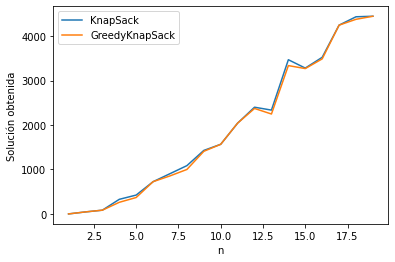

In [109]:
x=[n for n in range(1,20)] 
y=[]; 
z=[];

for n in range(1,20):


  W, val, wt = knapsack_instance_generator(n)
  verbose=False
  cont = [0]
  a = knapSack_dinamico(W, wt, val, len(val),cont,verbose)

  cont2 = [0]
  b = KnapSack_greedy(val, wt, W, len(val),cont2,verbose)

  y.append(a)
  z.append(b)

plt.plot(x,y)
plt.plot(x,z)
plt.legend(["KnapSack", "GreedyKnapSack"])

plt.xlabel('n')
plt.ylabel('Solución obtenida')
plt.show()

# **6.Análisis de resultados**

### **Gráfico 1:**

En el primer gráfico, el tiempo de ejecición del algoritmo dinamico para resolver este problema, el resultado confirma lo visto anteriormente donde la complejidad es O(n*p) y en que usa el metodo greedy es O(n^2) aunque se vea como linea recta es producto que el tiempo de ejecucion del metodo dinamico es muy alto.


### **Gráfico 2:**

Es evidente como crece la cantidad de sub-problema que tiene que resolver el metodo dinamico lo que nos ratifica el por que se demora tanto en ejecutarse el algoritmo dinamico, y se nota que el metodo greedy solo itera n veces


### **Gráfico 3:**

Al ver el gráfico detalladamente se aprecia que no obtienen la misma precisión en los datos, esto se explica en la correctitud y confirma que la programación dinámica logra la solución óptima, en cambio, el método greedy no siempre será el más óptimo
